# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [5]:
df = pd.read_csv('Countries-exercise.csv')
df.sample(5)

,name,Longitude,Latitude
52,CuraÃ§ao,-68.971194,12.195517
34,Barbados,-59.559797,13.181454
176,Dem. Rep. Korea,127.192480,40.153503
7,United Arab Emirates,54.300167,23.905282
110,Japan,138.030896,37.592301


Remove the duplicate index column from the dataset. 

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

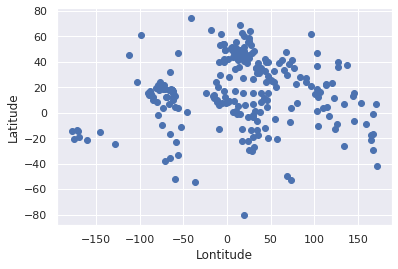

In [7]:
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.xlabel('Lontitude')
plt.ylabel('Latitude')
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [8]:
X = df.iloc[:, 1:]

## Clustering

Use 4 clusters initially.

In [9]:
kmeans = KMeans(4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [10]:
results = kmeans.labels_

In [11]:
data = df.copy()
data['Clusters'] = results

Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

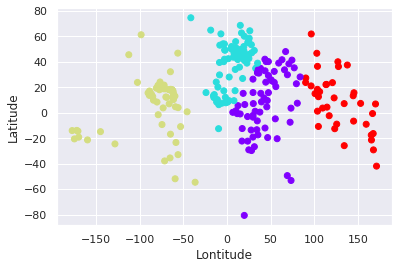

In [13]:
plt.scatter(x=data['Longitude'], y=data['Latitude'], c=data['Clusters'], cmap='rainbow')
plt.xlabel('Lontitude')
plt.ylabel('Latitude')
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [14]:
kmeans.inertia_

256573.08675934302

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [17]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256590.58575406106,
 192212.4818949704,
 151734.4555070838,
 127465.62670990065,
 103021.48914073562,
 84945.19461239543,
 76613.59536969497]

### The Elbow Method

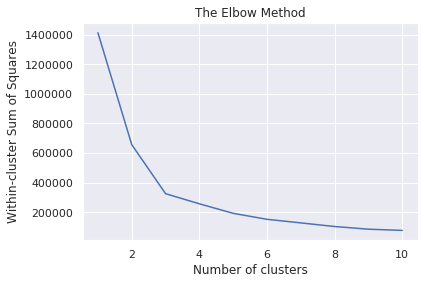

In [20]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>